In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from datetime import datetime
import numpy as np

import warnings
warnings.simplefilter('ignore')

from utils import get_dataframe

In [2]:
data = get_dataframe(solar_noon_altitudes=True)
data.head()

,Datum und Uhrzeit,Gesamtanlage[kWh],FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,Solar noon altitudes
0,01.01.2019,1.71013,15.2,4.8,1.6,8,0.0,0,7.9,7.1,965.6,4.1,87.0,5.2,2.7,1.9,0.328030
1,02.01.2019,0.02722,17.0,6.0,0.6,8,0.7,0,7.0,5.0,965.5,0.4,78.0,3.2,-2.1,-4.8,0.329488
2,03.01.2019,0.49862,10.1,4.1,0.0,8,2.9,0,7.4,3.9,971.2,-1.9,73.0,-0.6,-3.1,-4.4,0.331079
3,04.01.2019,0.00908,12.1,4.2,5.0,8,0.0,0,7.7,4.8,970.3,-1.1,85.0,-0.3,-1.7,-2.2,0.332803
4,05.01.2019,0.00005,16.1,6.5,22.1,8,0.0,5,7.6,5.9,963.8,0.0,96.0,1.0,-0.9,-0.8,0.334658


# Compare monthly estimated production with actual production

In [3]:
# add column for year, month and day of the year
# convert "Datum und Uhrzeit" column to date
data["Date"] = [datetime.strptime(data["Datum und Uhrzeit"][i], "%d.%m.%Y") for i in range(len(data))]
data["Year"] = data["Date"].dt.year
data["Day of year"] = data["Date"].dt.dayofyear
data["Month"] = data["Date"].dt.month
data = data.drop("Date", axis=1)

In [4]:
# PVGIS estimates of solar electricity generation
kWp_system = 0.310 * 22
estimates_data = {"Jan": 19.4, "Feb": 34.7, "Mar": 74.4, "Apr": 102, "May": 120, "Jun": 124, "Jul": 126, 
                  "Aug": 106, "Sep": 75.0, "Oct": 47.8, "Nov": 23.7, "Dec": 15.8}
#estimates_data_hm = {'Jan':25.8, 'Feb':43.6, 'Mar':93.1, 'Apr':130, 'Mai':155, 'Jun':164, 'Jul':168, 'Aug':140,
#                     'Sep':97.5, 'Oct':62.0, 'Nov':31.8, 'Dec':21.9,}
estimates = pd.DataFrame.from_dict(estimates_data, orient="index", columns=["kWh (1kWp)"])
estimates["Month"] = np.arange(1, 13)
estimates["Gesamtanlage[kWh]"] = estimates["kWh (1kWp)"] * kWp_system
estimates

,kWh (1kWp),Month,Gesamtanlage[kWh]
Jan,19.4,1,132.308
Feb,34.7,2,236.654
Mar,74.4,3,507.408
Apr,102.0,4,695.640
May,120.0,5,818.400
Jun,124.0,6,845.680
Jul,126.0,7,859.320
Aug,106.0,8,722.920
Sep,75.0,9,511.500
Oct,47.8,10,325.996


In [5]:
# total energy production per month
production = []
for year in data["Year"].unique():
    year_data = data[data["Year"] == year]
    month_data = year_data.groupby(by="Month").sum()["Gesamtanlage[kWh]"].reset_index()
    month_data["Year"] = year
    production.append(month_data)
monthly_production = pd.concat(production)
monthly_production.reset_index(drop=True)

,Month,Gesamtanlage[kWh],Year
0,1,78.06257,2019
1,2,281.71406,2019
2,3,526.10796,2019
3,4,754.28299,2019
4,5,812.45384,2019
5,6,1102.89153,2019
6,7,946.61305,2019
7,8,784.25607,2019
8,9,567.57438,2019
9,10,310.81262,2019


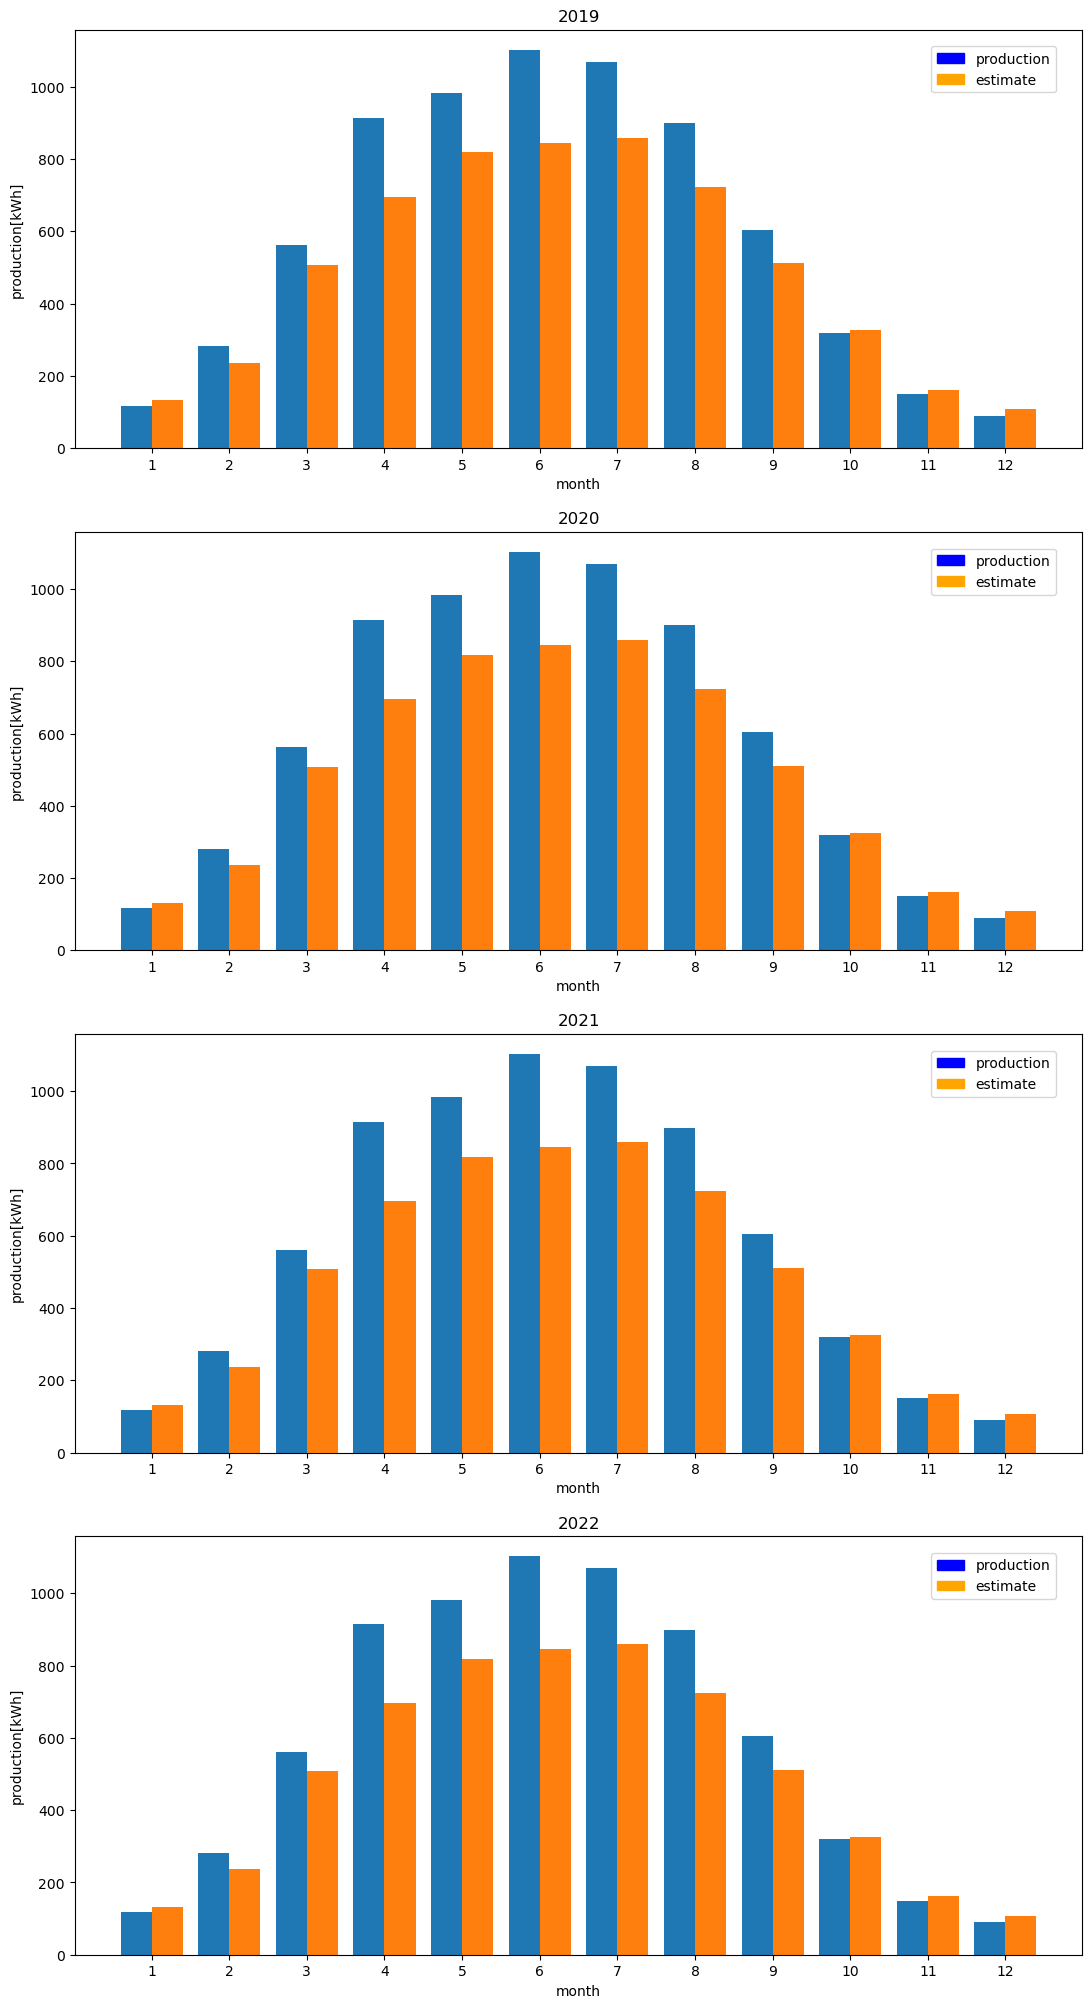

In [6]:
fig, axes = plt.subplots(4, 1, figsize=(13,25), sharey=False)
i = 0
for year in monthly_production["Year"].unique():
    ax = axes.flatten()[i]
    year_data = monthly_production[monthly_production["Year"] == year]
    ax.bar(monthly_production["Month"]-0.2,monthly_production["Gesamtanlage[kWh]"], width=0.4)
    ax.bar(estimates["Month"]+0.2, estimates["Gesamtanlage[kWh]"], width=0.4)
    ax.set_xticks(np.arange(1, 13))
    i+=1
    ax.set_xlabel("month")
    ax.set_ylabel("production[kWh]")
    ax.set_title(year)

    # legend
    colors = {'production': 'blue', 'estimate': 'orange'}
    patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
    ax.legend(handles=patch, loc=(0.85,0.85))

Looks strange: we expect that the actual production is less than the expected production (due to non optimized panel etc) Maybe the years were better (sunnier, etc) than the average expected used by the pvgis model????

In [126]:
months[5]

'June'

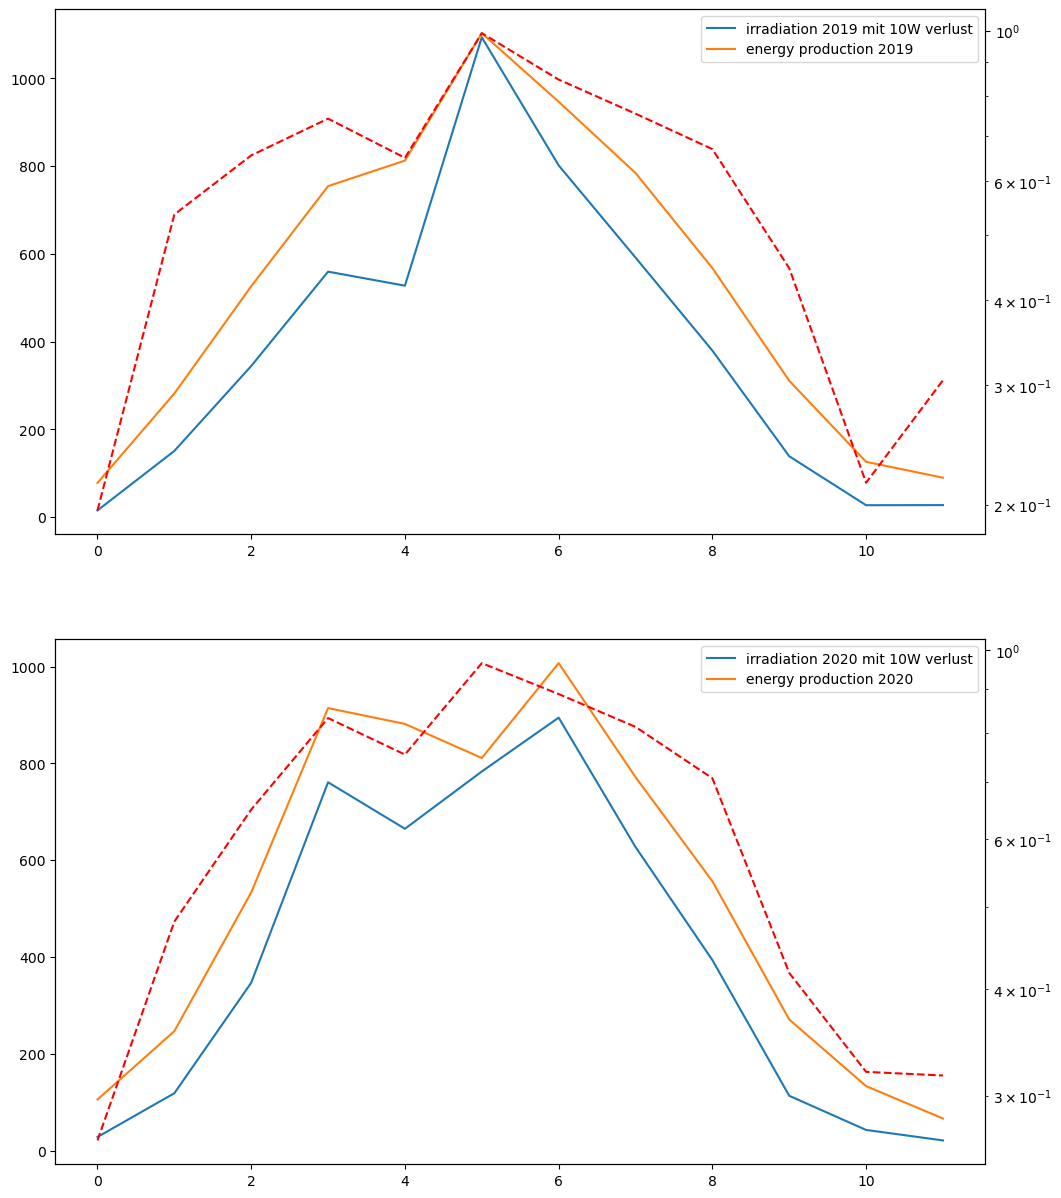

In [185]:
# monthly irradiation [kWh/m^2] from pvgis
irradiation_2019 = np.array([40.43, 110.44, 134.98, 152.92, 133.87, 204.45, 174.62, 155.54, 137.88, 92.03, 44.42, 62.9])
irradiation_2020 = np.array([74.07, 86.77, 135.94, 208.08, 168.79, 146.47, 194.9, 164.95, 143.05, 75.14, 69.75, 48.15])

length_module = 1640 / 1000 # in m
width_module = 992 / 1000 # in m
number_modules = 22
wirkungsgrad = 0.16 #0.191
#loss = [0.85-0.3*np.abs(x-4)/6.0 for x in range(12)] # sonstige Verluste (wechselrichter, kabel)
nominalprod = monthly_production[monthly_production["Year"] == 2019]["Gesamtanlage[kWh]"]

area_pv = np.round(length_module * width_module * number_modules, 2)

fig, axes = plt.subplots(2, 1, figsize=(12,15), sharey=False)

for i, (year, data) in enumerate({2019:irradiation_2019, 2020: irradiation_2020}.items()):
    data = data * area_pv * wirkungsgrad
    for loss_watt in [10,
                     ]:
        loss =  0.93* ( nominalprod/ max([0.1]+ (nominalprod-16*(loss_watt/1000.0)*30)))
        data_with_loss = data * loss
        axes[i].plot(data_with_loss,label=f"irradiation {year} mit {loss_watt}W verlust")
    axes[i].plot(monthly_production[monthly_production["Year"] == year]["Gesamtanlage[kWh]"],label=f"energy production {year}")
    axis_twin = axes[i].twinx()
    axis_twin.semilogy(data_with_loss/monthly_production[monthly_production["Year"] == year]["Gesamtanlage[kWh]"], color="red", linestyle="--")
    axes[i].legend()
plt.show()

# Look at production per hour

In [7]:
data_interpolated = get_dataframe(interpolate_data=True)
# add column with interpolated hours of sunshine
data["SDK interpolated"] = data_interpolated["SDK"]

In [8]:
# production of one module per hour of sunshine for each day
prod_per_hour_per_module = np.divide(data["Gesamtanlage[kWh]"], data["SDK"], out=np.zeros_like(data["Gesamtanlage[kWh]"]), where=data["SDK"]!=0) / 22
prod_per_hour_per_module_interpolated = np.divide(data["Gesamtanlage[kWh]"], data["SDK interpolated"], 
                                                  out=np.zeros_like(data["Gesamtanlage[kWh]"]), where=data["SDK interpolated"]!=0) / 22
data["production per hour per module"] = prod_per_hour_per_module
data["production per hour per module interpolated"] = prod_per_hour_per_module_interpolated
print("Maximum production per module and solar hour under optimum test conditions according to the manufacturer: 0.31 kWh")
print("Mean production per hour: " + str(np.round(prod_per_hour_per_module.mean(), 2)) + " kWh - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.mean(), 2)) + " kWh")
print("Median production per hour: " + str(np.round(prod_per_hour_per_module.median(), 2)) + " kWh - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.median(), 2)) + " kWh")
print("Max production per hour: " + str(np.round(prod_per_hour_per_module.max(), 2)) + " kWh - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.max(), 2)) + " kWh")
print("Standard deviation: " + str(np.round(prod_per_hour_per_module.std(), 2)) + " - interpolated: " 
      + str(np.round(prod_per_hour_per_module_interpolated.std(), 2)))

Maximum production per module and solar hour under optimum test conditions according to the manufacturer: 0.31 kWh
Mean production per hour: 0.37 kWh - interpolated: 0.44 kWh
Median production per hour: 0.13 kWh - interpolated: 0.13 kWh
Max production per hour: 38.18 kWh - interpolated: 39.92 kWh
Standard deviation: 1.58 - interpolated: 1.85


It is unrealistic to obtain a production per hour and module of more than 0.31 kWh -> these are values are due to wrong sun shine data (there is more sun at the location were the module is located than reported at the weather station some kilometers away)

In [9]:
print("How many days are unrealistic? (production is greater 0.31 kWh)")
outlier_days = (data["production per hour per module"] > 0.31).sum()
outlier_days_interpolated = (prod_per_hour_per_module_interpolated > 0.31).sum()
print(str(outlier_days) + " of " + str(len(data)) + " days in total in the data set")
print("For the interpolated hours of sunshine:")
print(str(outlier_days_interpolated) + " of " + str(len(data)) + " days in total in the data set")

How many days are unrealistic? (production is greater 0.31 kWh)
230 of 1461 days in total in the data set
For the interpolated hours of sunshine:
237 of 1461 days in total in the data set


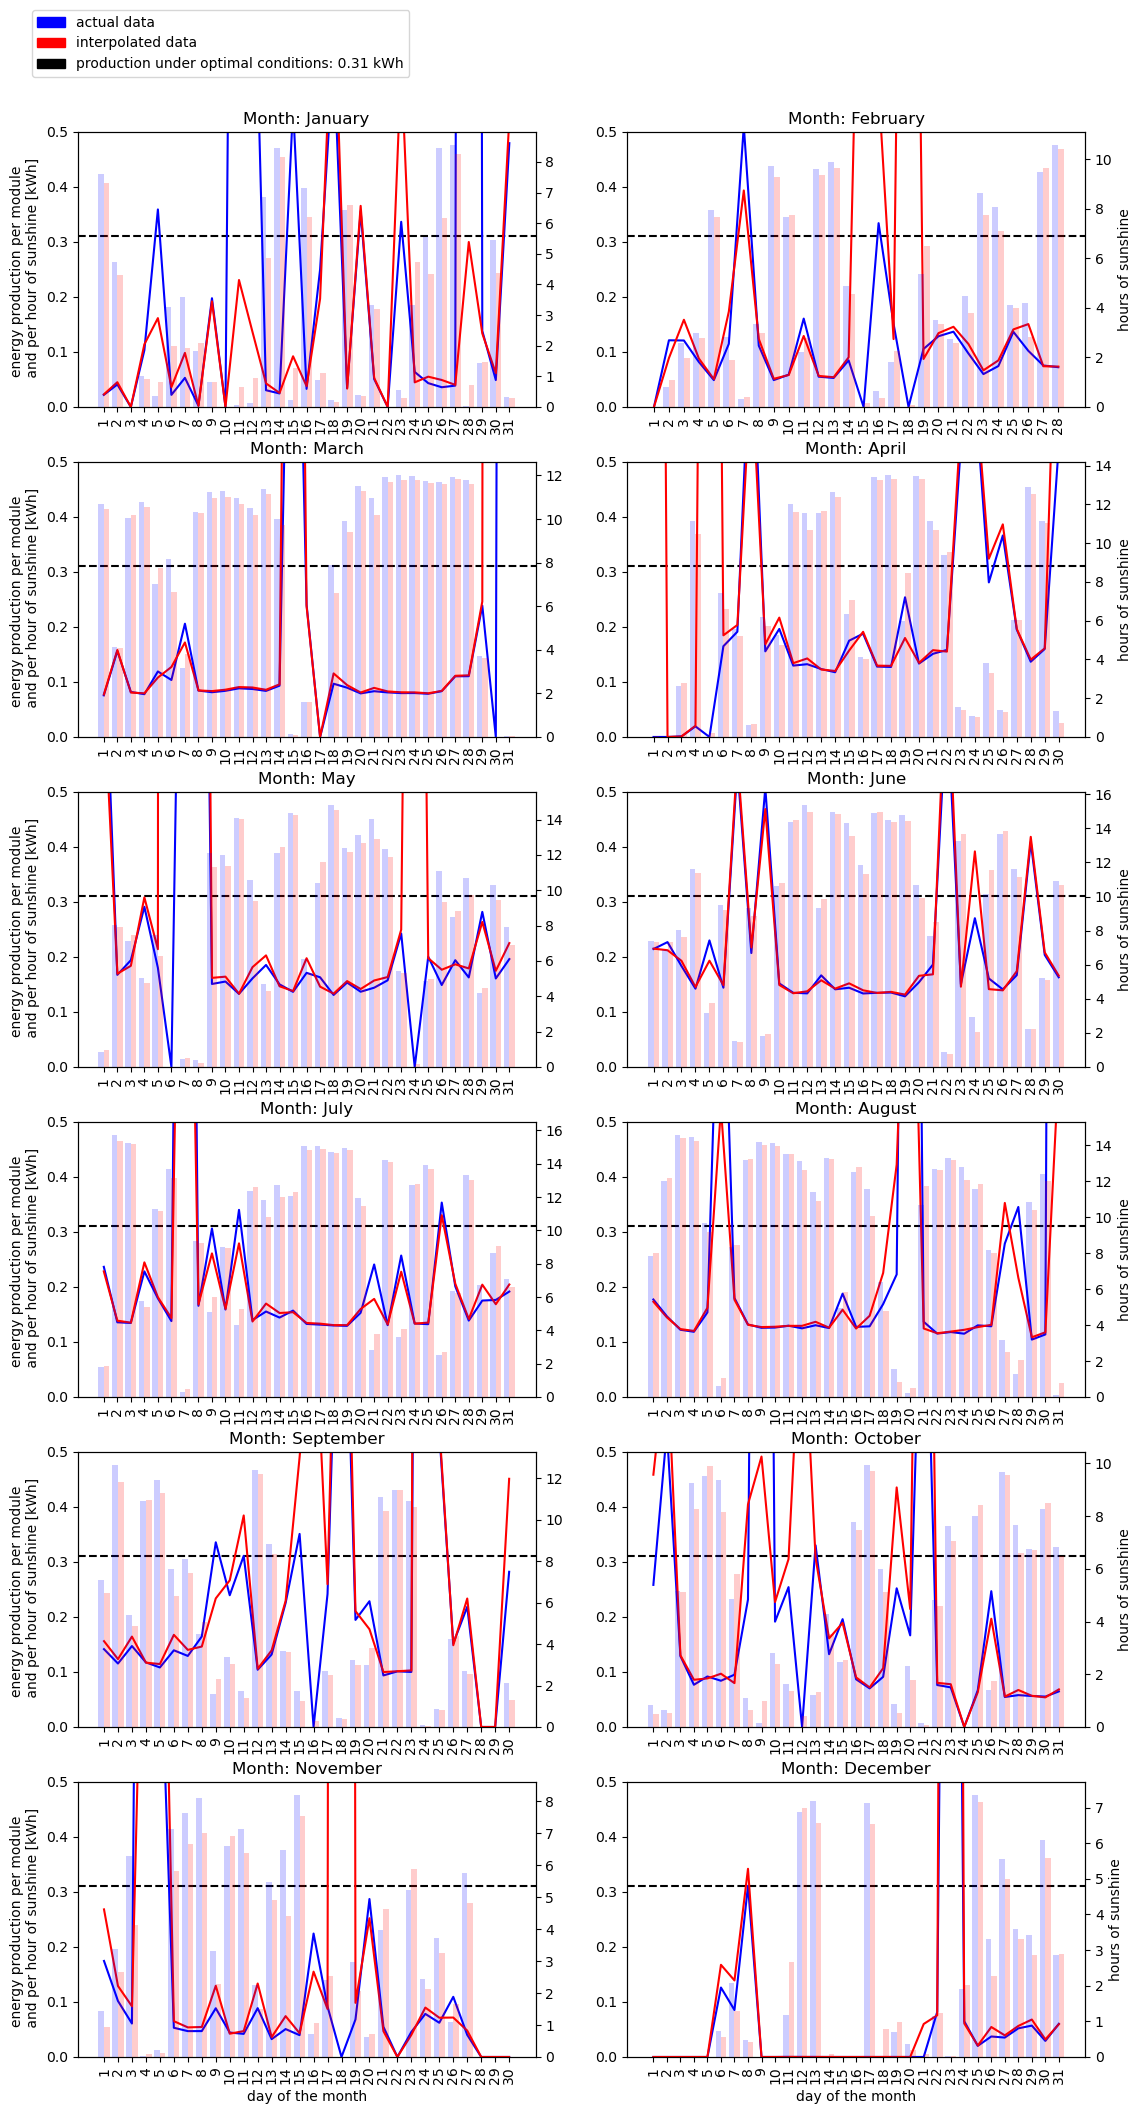

In [12]:
year = 2022
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fig, axes = plt.subplots(6, 2, figsize=(13,25), sharey=False)
i = 0
for month in data["Month"].unique():
    ax = axes.flatten()[i]
    ax2 = ax.twinx()
    ax.set_title("Month: " + months[month-1])
    year_data = data[data["Year"]==year]
    month_data = year_data[year_data["Month"] == month]
    
    ax.axhline(0.31, color="black", linestyle="--")
    # plot energy production per sunhour
    ax.plot(
        month_data["Datum und Uhrzeit"],
        month_data["production per hour per module"],
        color="blue"
    )
    ax.plot(
        month_data["Datum und Uhrzeit"],
        month_data["production per hour per module interpolated"],
        color="red"
    )
    ax2.bar(
        np.arange(len(month_data))-0.2,
        month_data["SDK"],
        color="blue",
        alpha=0.2,
        width=0.4)
    ax2.bar(
        np.arange(len(month_data))+0.2,
        month_data["SDK interpolated"],
        color="red",
        alpha=0.2,
        width=0.4)
    ax.set_xticklabels(np.arange(len(month_data))+1, rotation=90)
    ax.set_ylim(0,0.5)
    if i in [0, 2, 4, 6, 8, 10]:
        ax.set_ylabel("energy production per module \n and per hour of sunshine [kWh]")
    else:
        ax2.set_ylabel("hours of sunshine")
    i += 1
    
axes[5,0].set_xlabel("day of the month")
axes[5,1].set_xlabel("day of the month")
# legend
colors = {'actual data': 'blue', 'interpolated data': 'red', "production under optimal conditions: 0.31 kWh": "black"}
patch = [mpatches.Patch(color=color, label=label) for (label,color) in colors.items()]
plt.legend(handles=patch, loc=(-1.3,7.2))
plt.show()

In [27]:
years = [2019, 2020, 2021, 2022]
print("Mean production per hour per module for each month")
data_no_outliers = data[(data["production per hour per module"] <= 0.31) & (data["production per hour per module"] > 0)]
mean_prod = {}
for year in years:
    print(year)
    mean_prod[year] = {}
    for month in range(1, 13):
        month_data = data_no_outliers[(data_no_outliers["Year"] == year) & (data_no_outliers["Month"] == month)]
        mean_prod_per_hour = month_data["production per hour per module"].mean()
        mean_prod[year][month] = np.round(mean_prod_per_hour*1000, 2)
        print(months[month-1] + ": " + str(np.round(mean_prod_per_hour*1000, 2)) + " Watt")

Mean production per hour per module for each month
2019
January: 89.01 Watt
February: 65.62 Watt
March: 143.52 Watt
April: 168.55 Watt
May: 173.83 Watt
June: 153.37 Watt
July: 166.33 Watt
August: 154.76 Watt
September: 133.49 Watt
October: 97.56 Watt
November: 114.04 Watt
December: 45.07 Watt
2020
January: 43.49 Watt
February: 132.5 Watt
March: 141.83 Watt
April: 130.16 Watt
May: 174.86 Watt
June: 165.9 Watt
July: 164.37 Watt
August: 149.2 Watt
September: 109.64 Watt
October: 137.49 Watt
November: 66.95 Watt
December: 60.12 Watt
2021
January: 35.93 Watt
February: 85.59 Watt
March: 107.14 Watt
April: 163.93 Watt
May: 187.77 Watt
June: 160.29 Watt
July: 166.35 Watt
August: 175.24 Watt
September: 119.88 Watt
October: 91.64 Watt
November: 83.72 Watt
December: 42.78 Watt
2022
January: 64.9 Watt
February: 95.66 Watt
March: 106.44 Watt
April: 150.93 Watt
May: 175.04 Watt
June: 167.32 Watt
July: 169.11 Watt
August: 143.27 Watt
September: 160.77 Watt
October: 126.32 Watt
November: 84.03 Watt
De

In [53]:
print("Yearly")
print("Mean production per hour per module:")
for year in years:
    print(str(year) + ": " + str(np.round(np.array(list(mean_prod[year].values())).mean(), 2)) + "W")

print("Minimum production per hour per module:")
for year in years:
    min_month = np.array(list(mean_prod[year].values())).argmin()
    print(str(year) + ": " + str(mean_prod[year][min_month+1]) + "W (" + months[min_month] + ")")

print("Maximum production per hour per module:")
for year in years:
    max_month = np.array(list(mean_prod[year].values())).argmax()
    print(str(year) + ": " + str(mean_prod[year][max_month+1]) + "W (" + months[max_month] + ")")

print("")
print("Monthly")
print("Mean production per hour per module:")
for month in range(1, 13):
    prod = []
    for year in years:
        prod.append(mean_prod[year][month])
    print(months[month-1] + ": " + str(np.round(np.array(prod).mean(), 2)) + "W")

Yearly
Mean production per hour per module:
2019: 125.43W
2020: 123.04W
2021: 118.36W
2022: 124.19W
Minimum production per hour per module:
2019: 45.07W (December)
2020: 43.49W (January)
2021: 35.93W (January)
2022: 46.44W (December)
Maximum production per hour per module:
2019: 173.83W (May)
2020: 174.86W (May)
2021: 187.77W (May)
2022: 175.04W (May)

Monthly
Mean production per hour per module:
January: 58.33W
February: 94.84W
March: 124.73W
April: 153.39W
May: 177.88W
June: 161.72W
July: 166.54W
August: 155.62W
September: 130.94W
October: 113.25W
November: 87.18W
December: 48.6W


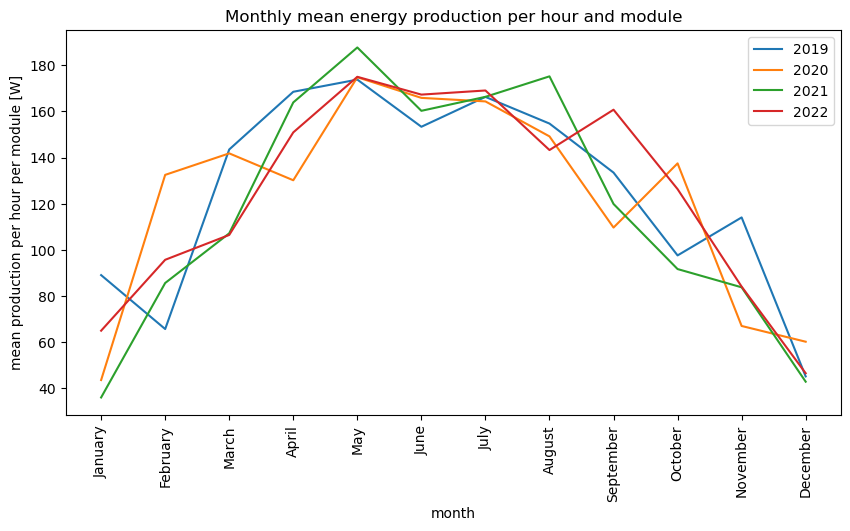

In [88]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for year in years:
    ax.plot(mean_prod[year].values(), label=year)
plt.xticks(np.arange(12), rotation=90)
ax.set_xticklabels(months)
ax.set_xlabel("month")
ax.set_ylabel("mean production per hour per module [W]")
plt.title("Monthly mean energy production per hour and module")
# legend
plt.legend()
plt.show()